## Consegna
Si richiede un'implementazione di un esercizio di Topic Modeling, utilizzando librerie open (come ad es. GenSim (https://radimrehurek.com/gensim/). Si richiede l'utilizzo di un corpus di almeno 1k documenti. Testare un algoritmo (ad esempio LDA) con più valori di k (num. di topics) e valutare la coerenza dei risultati, attraverso fine-tuning su parametri e pre-processing. Update: essendo che spesso i topic, per essere interpretabili, devono contenere content words, potete pensare di filtrare solamente i sostantivi in fase di preprocessing (cioè POS=noun).

## Import

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import gensim
import nltk
from nltk.corpus import reuters
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from pprint import pprint
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:


# Scarica il dataset "reuters" se non è già stato scaricato
nltk.download('reuters')

# Ottiene l'elenco dei file nel dataset
file_ids = reuters.fileids()
documents = []

for i in range(0,len(file_ids)):
    documents.append(reuters.raw(file_ids[i]))


    


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Volpe\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


## Estrazione sostantivi e pulizia del corpus

In [3]:
# Estrai i sostantivi dai documenti e crea il corpus
stop_words = set(stopwords.words('english'))
corpus = []
for document in documents:
    words = word_tokenize(document)
    words = [word.lower() for word in words if word.isalpha()
             and word.lower() not in stop_words]
    tagged_words = pos_tag(words)
    nouns = [word for word, pos in tagged_words if pos == 'NN']
    corpus.append(nouns)
    

In [4]:
for i in range(0,10):
    print(corpus[i])

['damage', 'rift', 'trade', 'friction', 'japan', 'row', 'damage', 'reuter', 'japan', 'lead', 'conflict', 'loss', 'retaliation', 'japan', 'failure', 'stick', 'pact', 'world', 'business', 'spokesman', 'co', 'ltd', 'lt', 'length', 'time', 'erosion', 'murtha', 'stock', 'analyst', 'tokyo', 'office', 'broker', 'seriousness', 'threat', 'japan', 'trade', 'official', 'trade', 'trade', 'surplus', 'dlrs', 'year', 'pct', 'surplus', 'exchange', 'world', 'trade', 'defuse', 'retaliation', 'paul', 'sheen', 'chairman', 'textile', 'group', 'official', 'trade', 'promotion', 'association', 'trade', 'dispute', 'japan', 'pressure', 'korea', 'japan', 'year', 'trade', 'surplus', 'dlrs', 'malaysia', 'trade', 'japan', 'japan', 'selling', 'share', 'view', 'advantage', 'pressure', 'block', 'view', 'lawrence', 'industry', 'prevent', 'day', 'hong', 'kong', 'action', 'trade', 'year', 'export', 'market', 'government', 'trade', 'interest', 'concern', 'industry', 'minister', 'john', 'button', 'canberra', 'kind', 'deter

## Calcolo del Dizionario {parola, frequenza}

In [5]:
word_freq = {}
for sentence in corpus:
    for w in sentence:
        if(w in word_freq):
            word_freq[w] +=1
        else:
            word_freq[w] = 1


## Stampa word cloud per frequenza parole

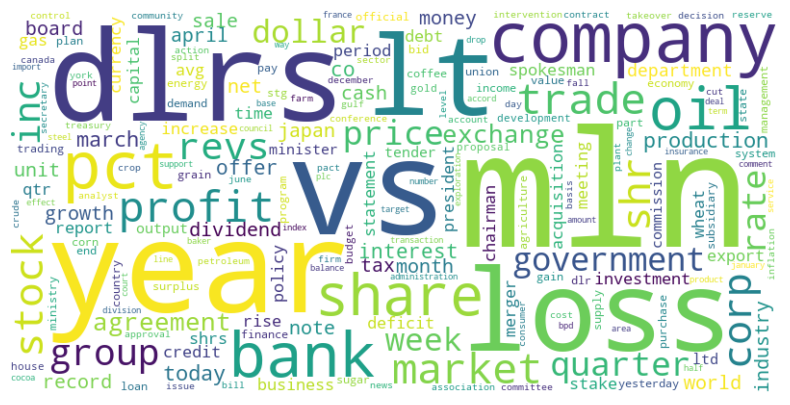

In [6]:
# Creazione di un oggetto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot del WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Creazione del dizionario e del corpus in formato bag-of-words

In [7]:

dictionary = Dictionary(corpus) ##id2word
corpus_bow = [dictionary.doc2bow(doc) for doc in corpus] #corpus



## Test di diversi valori di k (num. di topics)

In [15]:

k_values = list(range(1, 21))
coherence_scores = []

for k in k_values:
    lda_model = LdaModel(corpus_bow, num_topics=k, id2word=dictionary)

    coherence_model = CoherenceModel(
        model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Number of topics: {k}, Coherence Score: {coherence_score}")


Number of topics: 1, Coherence Score: 0.34044528831107396
Number of topics: 2, Coherence Score: 0.4321426422352913
Number of topics: 3, Coherence Score: 0.5478108115498618
Number of topics: 4, Coherence Score: 0.6124306129942891
Number of topics: 5, Coherence Score: 0.5573830202021013
Number of topics: 6, Coherence Score: 0.5669340649091527
Number of topics: 7, Coherence Score: 0.5196523953686922
Number of topics: 8, Coherence Score: 0.5894030973058566
Number of topics: 9, Coherence Score: 0.5613206391312974
Number of topics: 10, Coherence Score: 0.5055094663492772
Number of topics: 11, Coherence Score: 0.5853711285036555
Number of topics: 12, Coherence Score: 0.5415884715407241
Number of topics: 13, Coherence Score: 0.4932616480979692
Number of topics: 14, Coherence Score: 0.5594367916704629
Number of topics: 15, Coherence Score: 0.527803094362604
Number of topics: 16, Coherence Score: 0.5509693635113383
Number of topics: 17, Coherence Score: 0.4980326623528705
Number of topics: 18, C

## Stampa dei risultati

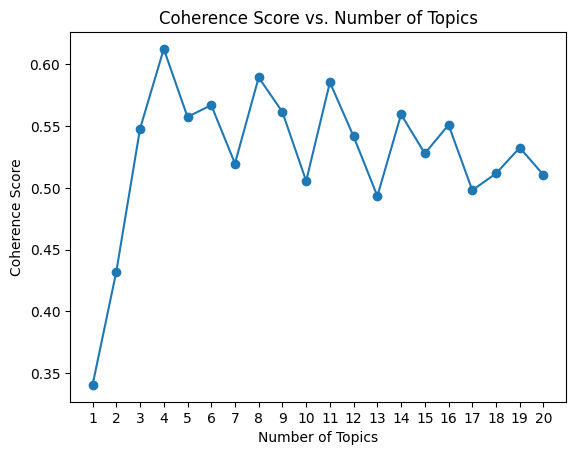

In [19]:
plt.plot(k_values, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')

plt.xticks(range(min(k_values), max(k_values)+1, 1))

plt.show()